In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
file_path = 'AppleMusic.csv'
music_df = pd.read_csv(file_path)

music_df.head()

,Title,Length of Song,Artist Name,Album,Genre,Star,Plays,Release Date,Year,Skips,Last Played,Date Added To Library
0,The A Team,4:18,Ed Sheeran,+ (Deluxe Version),Pop,1,8.0,07/02/2010,2010.0,14.0,"21/08/2024, 8:00 AM","06/08/2020, 9:44 PM"
1,Aaya Na Tu,3:30,Arjun Kanungo & Momina Mustehsan,Aaya Na Tu - Single,Indian Pop,0,46.0,20/06/2018,2018.0,5.0,"09/07/2023, 8:37 PM","08/08/2020, 1:08 AM"
2,ABCD,3:26,"Pritam, Benny Dayal, Shefali Alvares & Yo Yo H...",Yaariyan (Original Motion Picture Soundtrack),Bollywood,0,NaN,09/12/2013,2013.0,1.0,NaN,"25/09/2024, 4:31 PM"
3,Abhi Kuch Dino Se,4:46,Pritam & Mohit Chauhan,Dil Toh Baccha Hai Ji (Original Motion Picture...,Bollywood,1,5.0,23/12/2010,2010.0,7.0,"23/12/2022, 11:21 AM","13/05/2021, 5:25 PM"
4,Addicted,3:57,Prince Royce,Phase II,Salsa and Tropical,1,4.0,10/04/2012,2012.0,9.0,"28/01/2024, 9:09 AM","05/08/2020, 11:29 PM"


In [4]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  1132 non-null   object 
 1   Length of Song         1132 non-null   object 
 2   Artist Name            1130 non-null   object 
 3   Album                  1130 non-null   object 
 4   Genre                  1128 non-null   object 
 5   Star                   1132 non-null   int64  
 6   Plays                  955 non-null    float64
 7   Release Date           1126 non-null   object 
 8   Year                   1131 non-null   float64
 9   Skips                  1040 non-null   float64
 10  Last Played            957 non-null    object 
 11  Date Added To Library  1132 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 106.3+ KB


In [5]:
# Convert 'Release Date', 'Last Played', and 'Date Added To Library' to datetime
music_df['Release Date'] = pd.to_datetime(music_df['Release Date'], errors='coerce', dayfirst=True)
music_df['Last Played'] = pd.to_datetime(music_df['Last Played'], errors='coerce', dayfirst=True)
music_df['Date Added To Library'] = pd.to_datetime(music_df['Date Added To Library'], errors='coerce', dayfirst=True)

In [7]:
# Convert 'Length of Song' to a numeric value in minutes
def convert_length_to_minutes(length_str):
    try:
        minutes, seconds = length_str.split(':')
        total_minutes = int(minutes) + int(seconds) / 60
        return total_minutes
    except:
        return None

music_df['Length of Song'] = music_df['Length of Song'].apply(convert_length_to_minutes)

# Check missing values
missing_values = music_df.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing 'Plays' and 'Skips' with 0 (assumes no plays/skips if NaN)
music_df['Plays'] = music_df['Plays'].fillna(0)
music_df['Skips'] = music_df['Skips'].fillna(0)

# Drop rows with missing Genre, Artist Name, or Album
music_df.dropna(subset=['Genre', 'Artist Name', 'Album'], inplace=True)

# Check for final cleaned dataset
print(music_df.info())

# Step 2: Data Overview and Summary Statistics
print("Summary of Music Listening Data:")
print(music_df.describe())

Missing values:
 Title                      0
Length of Song             3
Artist Name                2
Album                      2
Genre                      4
Star                       0
Plays                    177
Release Date               6
Year                       1
Skips                     92
Last Played              175
Date Added To Library      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1131
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  1127 non-null   object        
 1   Length of Song         1127 non-null   float64       
 2   Artist Name            1127 non-null   object        
 3   Album                  1127 non-null   object        
 4   Genre                  1127 non-null   object        
 5   Star                   1127 non-null   int64         
 6   Plays                  1127 non-null  

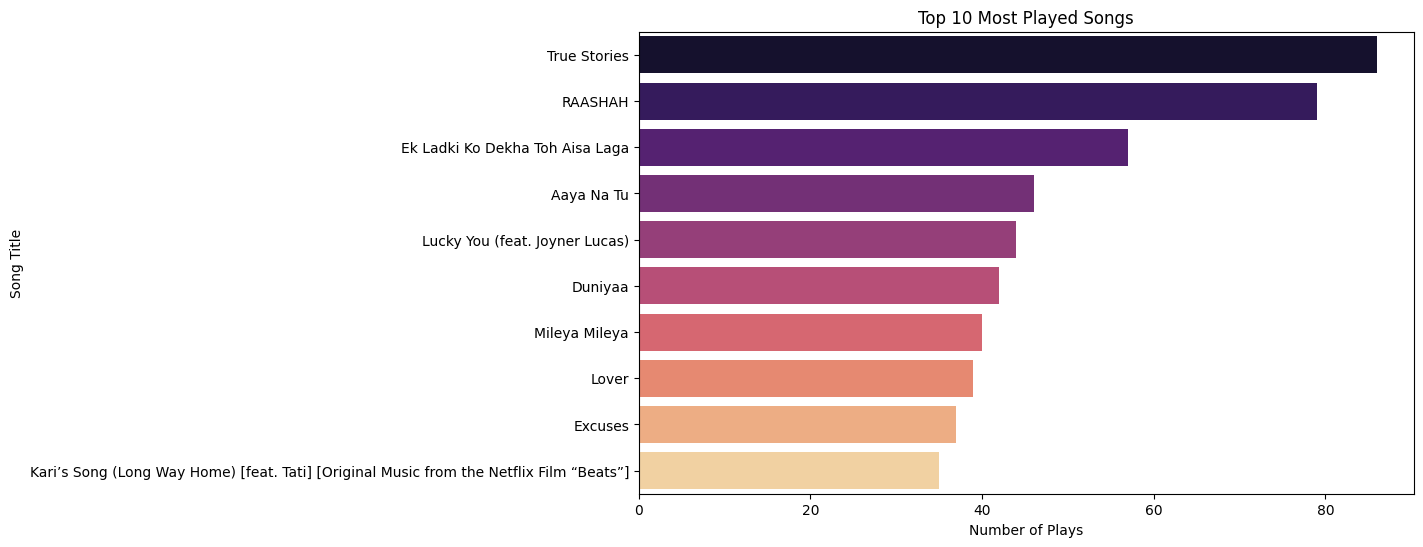

KeyError: 'Artist'

In [8]:
# Step 3: Visualizations

# 1. Top 10 Most Played Songs
top_songs = music_df.nlargest(10, 'Plays')
plt.figure(figsize=(10, 6))
sns.barplot(x='Plays', y='Title', data=top_songs, palette='magma')
plt.title('Top 10 Most Played Songs')
plt.xlabel('Number of Plays')
plt.ylabel('Song Title')
plt.show()

# 2. Top Artists by Plays
top_artists = music_df.groupby('Artist')['Plays'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Plays', y='Artist', data=top_artists, palette='viridis')
plt.title('Top 10 Artists by Plays')
plt.xlabel('Number of Plays')
plt.ylabel('Artist')
plt.show()

# 3. Genre Distribution
plt.figure(figsize=(10, 6))
music_df['Genre'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%', colormap='Set3', explode=[0.1]*10)
plt.title('Top 10 Genres in Music Library')
plt.ylabel('')
plt.show()

# 4. Correlation Between Skips and Star Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Star', y='Skips', data=music_df, hue='Genre', palette='coolwarm')
plt.title('Correlation Between Skips and Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Skips')
plt.show()

# 5. Listening Frequency Over Time (Date Added vs. Last Played)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date Added To Library', y='Plays', data=music_df, label='Date Added', color='blue')
sns.lineplot(x='Last Played', y='Plays', data=music_df, label='Last Played', color='green')
plt.title('Listening Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Plays')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 6. Release Year Distribution
plt.figure(figsize=(10, 6))
music_df['Year'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Songs by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.show()

# 7. Relationship Between Plays, Skips, and Length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length', y='Plays', size='Skips', hue='Genre', data=music_df, sizes=(20, 200), alpha=0.7)
plt.title('Relationship Between Plays, Skips, and Song Length')
plt.xlabel('Song Length (minutes)')
plt.ylabel('Number of Plays')
plt.show()

# Step 4: Insights
print("Top Insights:")
print("- Top Artists and Genres are highly reflective of your listening preferences.")
print("- There is a correlation between songs with higher skips and lower star ratings.")
print("- The release year analysis shows a trend of more recent songs being played frequently.")

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
file_path = 'AppleMusic.csv'
music_df = pd.read_csv(file_path)

# Step 1: Convert the 'Length', 'Release Date', 'Last Played', and 'Date Added To Library' columns to appropriate formats

# Convert 'Length' to total minutes
def convert_length_to_minutes(length_str):
    try:
        minutes, seconds = length_str.split(':')
        total_minutes = int(minutes) + int(seconds) / 60
        return total_minutes
    except:
        return None

music_df['Length'] = music_df['Length'].apply(convert_length_to_minutes)

# Convert 'Release Date', 'Last Played', and 'Date Added To Library' to datetime
music_df['Release Date'] = pd.to_datetime(music_df['Release Date'], errors='coerce')
music_df['Last Played'] = pd.to_datetime(music_df['Last Played'], errors='coerce')
music_df['Date Added To Library'] = pd.to_datetime(music_df['Date Added To Library'], errors='coerce')

# Convert 'Plays', 'Skips', and 'Star' to numeric
music_df['Plays'] = pd.to_numeric(music_df['Plays'], errors='coerce')
music_df['Skips'] = pd.to_numeric(music_df['Skips'], errors='coerce')
music_df['Star'] = pd.to_numeric(music_df['Star'], errors='coerce')

# Drop rows with missing 'Length' values
music_df.dropna(subset=['Length'], inplace=True)

# Step 2: Create 'Month Added' column from 'Date Added To Library'
# Ensure that the 'Date Added To Library' column is datetime
music_df['Month Added'] = music_df['Date Added To Library'].dt.to_period('M')

# Drop rows where 'Month Added' is null (if any)
music_df.dropna(subset=['Month Added'], inplace=True)

# Step 3: Monthly Trends in Plays
monthly_plays = music_df.groupby('Month Added')['Plays'].sum().reset_index()


/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_37163/2784289229.py:23: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  music_df['Release Date'] = pd.to_datetime(music_df['Release Date'], errors='coerce')


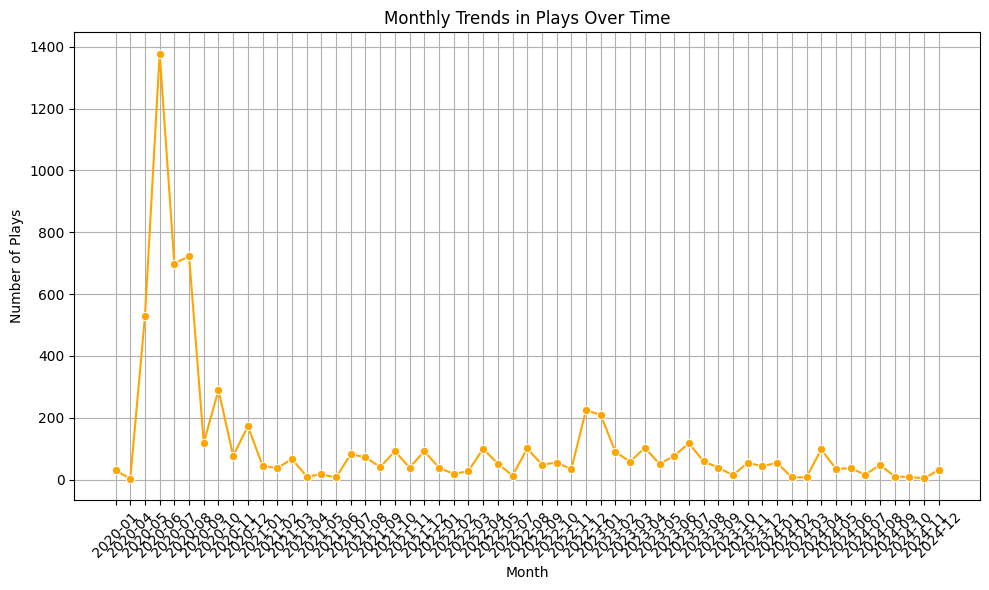

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'monthly_plays' DataFrame is already created
# and contains the 'Month Added' and 'Plays' columns

# Convert 'Month Added' back to string format for better visualization
monthly_plays['Month Added'] = monthly_plays['Month Added'].astype(str)

# Plot Monthly Trends in Plays
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month Added', y='Plays', data=monthly_plays, marker='o', color='orange')
plt.title('Monthly Trends in Plays Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Optional: Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_37163/2435506473.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  music_df['Release Date'] = pd.to_datetime(music_df['Release Date'], errors='coerce')


/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_37163/2435506473.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


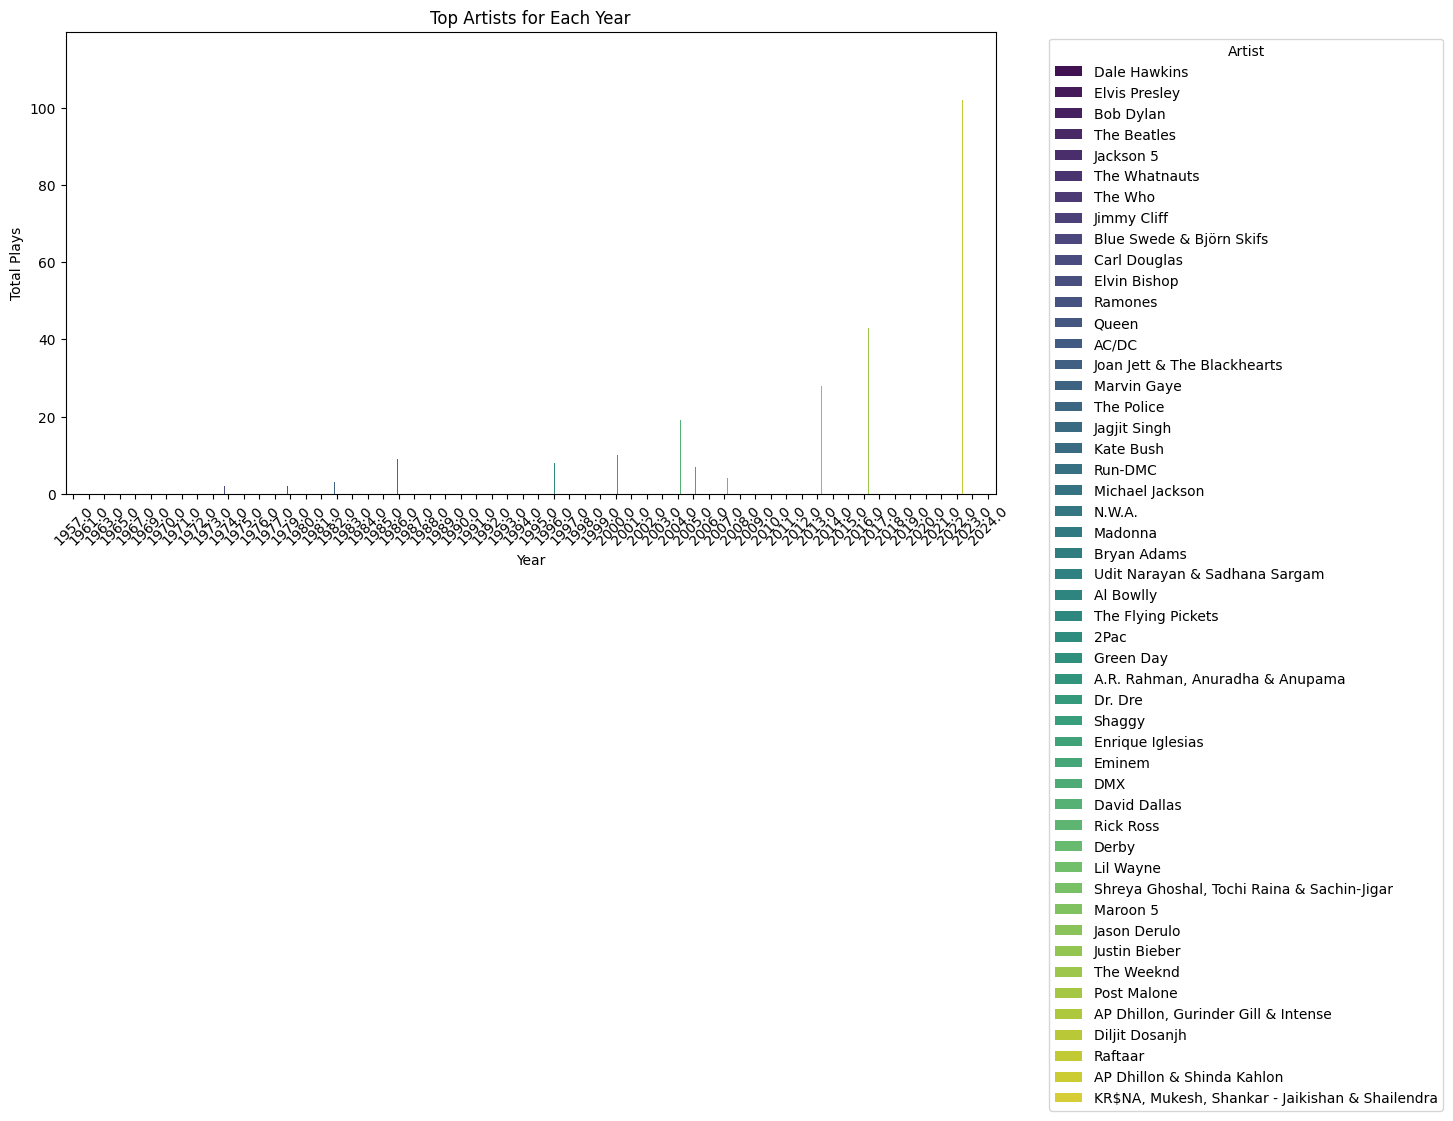

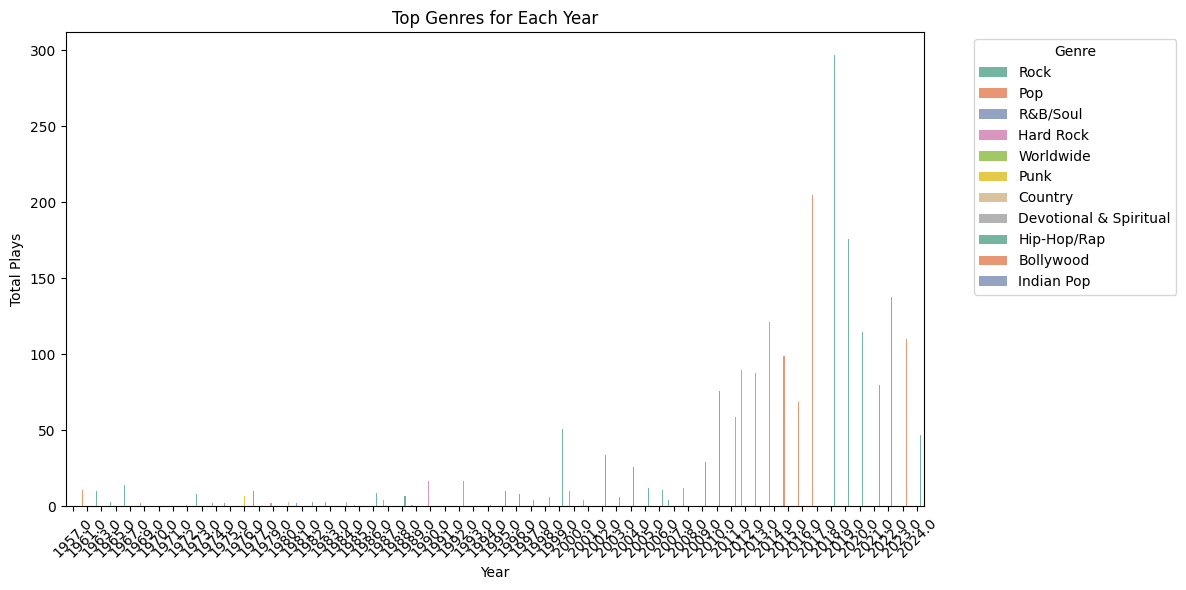

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_37163/2435506473.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


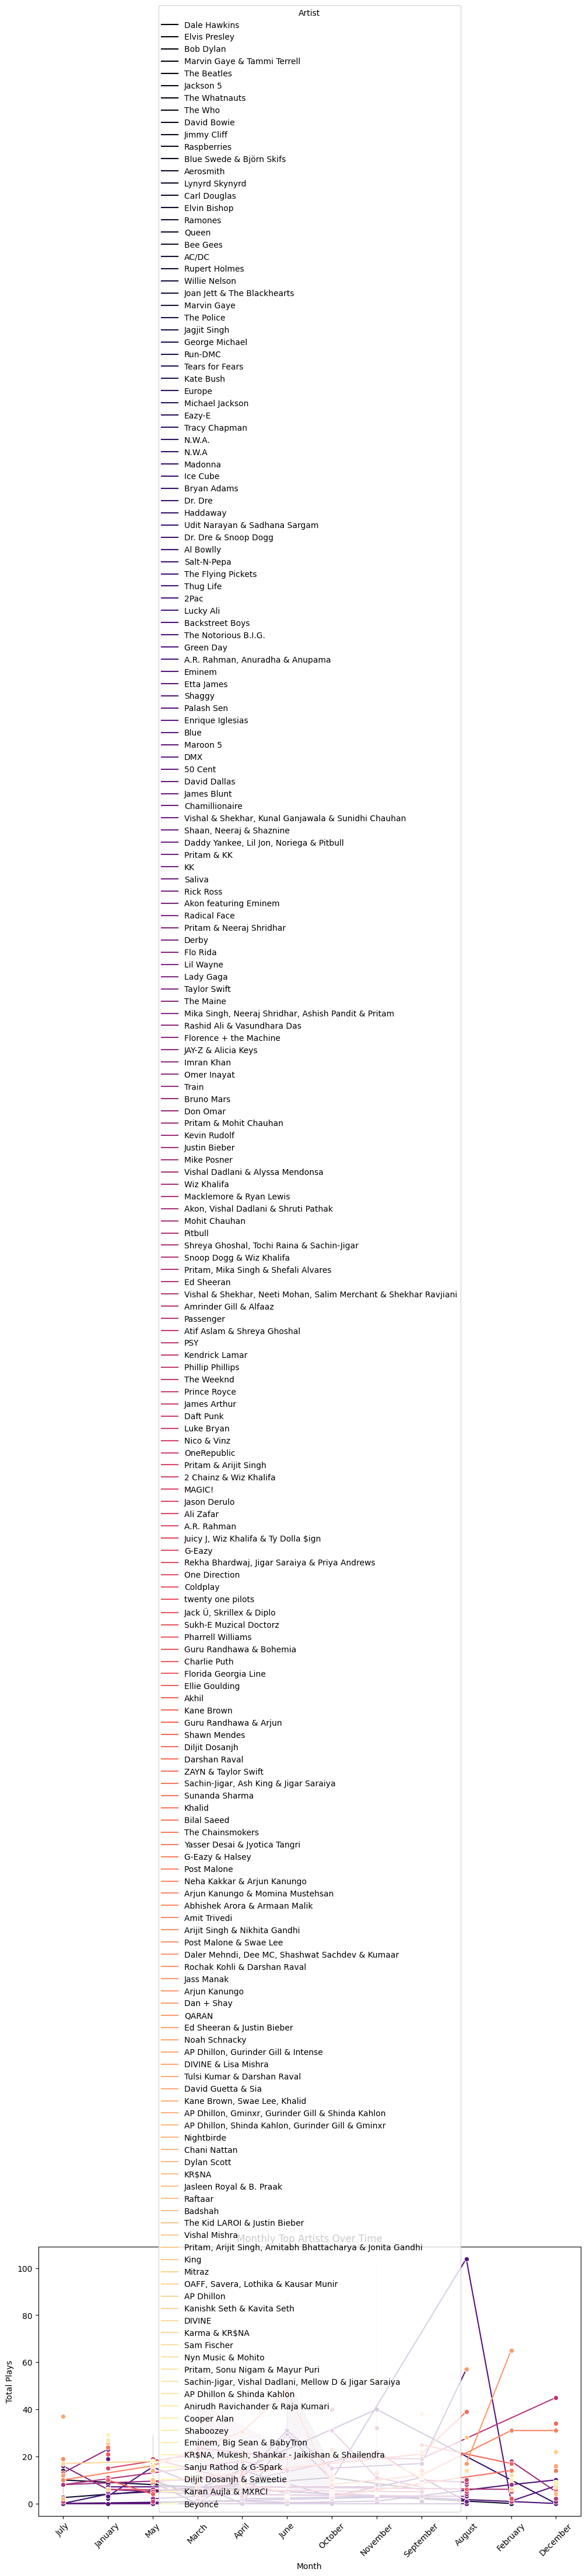

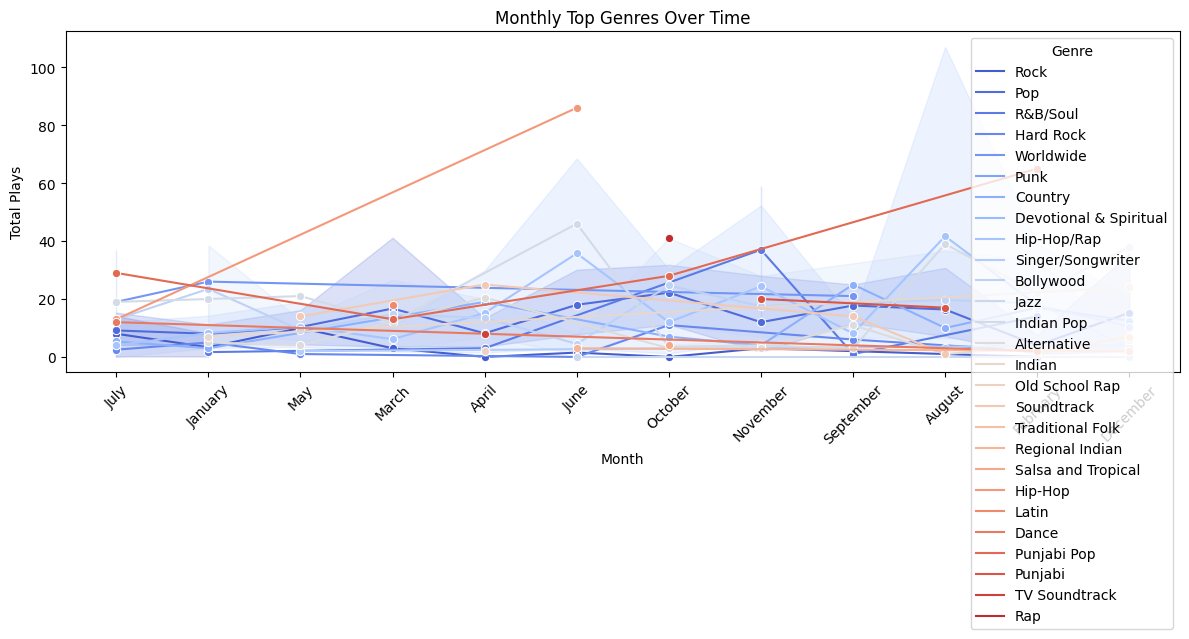

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
file_path = 'AppleMusic.csv'
music_df = pd.read_csv(file_path)

# Step 1: Convert 'Release Date' to datetime
music_df['Release Date'] = pd.to_datetime(music_df['Release Date'], errors='coerce')

# Check if the conversion worked
if music_df['Release Date'].isnull().any():
    print("Warning: Some dates could not be converted and are set to NaT.")

# Step 2: Extract Year and Month from Release Date
music_df['Year'] = music_df['Release Date'].dt.year
music_df['Month'] = music_df['Release Date'].dt.month_name()

# Step 3: Top Artists for Each Year
top_artists_per_year = music_df.groupby(['Year', 'Artist'])['Plays'].sum().reset_index()
top_artists_per_year = top_artists_per_year.loc[top_artists_per_year.groupby('Year')['Plays'].idxmax()]

# Plot Top Artists for Each Year
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists_per_year, x='Year', y='Plays', hue='Artist', palette='viridis')
plt.title('Top Artists for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Plays')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Top Genres for Each Year
top_genres_per_year = music_df.groupby(['Year', 'Genre'])['Plays'].sum().reset_index()
top_genres_per_year = top_genres_per_year.loc[top_genres_per_year.groupby('Year')['Plays'].idxmax()]

# Plot Top Genres for Each Year
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_per_year, x='Year', y='Plays', hue='Genre', palette='Set2')
plt.title('Top Genres for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Plays')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Monthly Analysis for Top Artists
monthly_top_artists = music_df.groupby(['Year', 'Month', 'Artist'])['Plays'].sum().reset_index()
monthly_top_artists = monthly_top_artists.loc[monthly_top_artists.groupby(['Year', 'Month'])['Plays'].idxmax()]

# Plot Monthly Top Artists
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_top_artists, x='Month', y='Plays', hue='Artist', palette='magma', marker='o')
plt.title('Monthly Top Artists Over Time')
plt.xlabel('Month')
plt.ylabel('Total Plays')
plt.xticks(rotation=45)
plt.legend(title='Artist')
plt.tight_layout()
plt.show()

# Step 6: Monthly Analysis for Top Genres
monthly_top_genres = music_df.groupby(['Year', 'Month', 'Genre'])['Plays'].sum().reset_index()
monthly_top_genres = monthly_top_genres.loc[monthly_top_genres.groupby(['Year', 'Month'])['Plays'].idxmax()]

# Plot Monthly Top Genres
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_top_genres, x='Month', y='Plays', hue='Genre', palette='coolwarm', marker='o')
plt.title('Monthly Top Genres Over Time')
plt.xlabel('Month')
plt.ylabel('Total Plays')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


# ML

In [1]:
# ML Part
# %%
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import requests
from bs4 import BeautifulSoup
import joblib
from tabulate import tabulate
import os

# Function to fetch trending songs from Billboard Hot 100
def fetch_trending_songs():
    url = 'https://www.billboard.com/charts/hot-100/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    songs = soup.find_all('h3', class_='c-title')
    artists = soup.find_all('span', class_='c-label')

    trending_songs = []
    for song, artist in zip(songs, artists):
        trending_songs.append({
            'Title': song.get_text(strip=True),
            'Artist': artist.get_text(strip=True),
            'Genre': 'Unknown',  # Placeholder, can implement genre classification later
            'Plays': 0,  # Initialize plays; can update this based on interactions
            'Skips': 0,
            'Day': datetime.now().strftime('%A')  # Current day for recommendation
        })

    return pd.DataFrame(trending_songs)

# Load the CSV data
file_path = 'AppleMusic.csv'
music_df = pd.read_csv(file_path)

In [2]:
if music_df.empty:
    print("The music DataFrame is empty. Please check your data source.")
    # You can exit the program or handle this case appropriately
    exit()

In [3]:
# Data Preprocessing
# Convert 'Length', 'Release Date', 'Last Played', and 'Date Added To Library' as before
def convert_length_to_minutes(length_str):
    try:
        minutes, seconds = length_str.split(':')
        total_minutes = int(minutes) + int(seconds) / 60
        return total_minutes
    except:
        return None

music_df['Length'] = music_df['Length'].apply(convert_length_to_minutes)
music_df['Release Date'] = pd.to_datetime(music_df['Release Date'], errors='coerce')
music_df['Last Played'] = pd.to_datetime(music_df['Last Played'], errors='coerce')
music_df['Date Added To Library'] = pd.to_datetime(music_df['Date Added To Library'], errors='coerce')

# Convert 'Plays', 'Skips', and 'Star' to numeric
music_df['Plays'] = pd.to_numeric(music_df['Plays'], errors='coerce')
music_df['Skips'] = pd.to_numeric(music_df['Skips'], errors='coerce')
music_df['Star'] = pd.to_numeric(music_df['Star'], errors='coerce')

# Step 2: Create Day of the Week column
music_df['Day'] = music_df['Last Played'].dt.day_name()

# Step 3: Define the features for the model
features = ['Length', 'Plays', 'Skips']  # You can include more features like genre encoded

In [4]:
if music_df.empty:
    print("The music DataFrame is empty. Please check your data source.")
    # You can exit the program or handle this case appropriately
    exit()

In [5]:
# Check if model already exists
model_file = 'knn_model.joblib'

if os.path.exists(model_file):
    # Load the model
    model = joblib.load(model_file)
else:
    # Train-test split
    X = music_df[features]
    y = music_df['Title']  # Assuming you want to recommend song titles
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = NearestNeighbors(n_neighbors=5)  # Recommend top 5 songs
    model.fit(X_train)

    # Save the model
    joblib.dump(model, model_file)

ValueError: Input X contains NaN.
NearestNeighbors does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [18]:
# Step 3: Define the features for the model
features = ['Length', 'Plays', 'Skips']  # You can include more features like genre encoded

# Train-test split
X = music_df[features]
y = music_df['Title']  # Assuming you want to recommend song titles

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = NearestNeighbors(n_neighbors=5)  # Recommend top 5 songs
model.fit(X_train)

NearestNeighbors()

In [ ]:


# Fetch trending songs and integrate
trending_songs_df = fetch_trending_songs()
music_df = pd.concat([music_df, trending_songs_df], ignore_index=True)

# Step 4: Get today's day and provide recommendations
today = datetime.now().strftime('%A')  # Use strftime to get the full day name

# Filter songs based on the day of the week
daily_music_df = music_df[music_df['Day'] == today]

# If no songs were played today, just recommend the top 5 most played songs
if daily_music_df.empty:
    recommended_songs = music_df.nlargest(5, 'Plays')
else:
    # Use the model to find nearest neighbors based on today's listening behavior
    distances, indices = model.kneighbors(daily_music_df[features].mean().values.reshape(1, -1))
    recommended_songs = music_df.iloc[indices[0]]

# Show recommendations in a pretty table format
print("Recommended Songs for Today:")
print(tabulate(recommended_songs[['Title', 'Artist', 'Genre']], headers='keys', tablefmt='pretty', showindex=False))

# Step 5: Get user feedback through a simple text interface
def get_user_feedback():
    print("\nPlease provide your feedback for the recommended songs:")
    for idx, song in recommended_songs.iterrows():
        print(f"{idx + 1}: {song['Title']} by {song['Artist']}")
    feedbacks = []
    for idx in recommended_songs.index:
        while True:
            try:
                feedback = int(input(f"Rate this song (1-5): "))
                if feedback < 1 or feedback > 5:
                    print("Please enter a valid number between 1 and 5.")
                    continue
                feedbacks.append(feedback)
                break
            except ValueError:
                print("Invalid input. Feedback must be an integer from 1 to 5.")
    return feedbacks

# Get feedback from the user
feedbacks = get_user_feedback()

# Adjust song preferences based on feedback
for index, feedback in zip(recommended_songs.index, feedbacks):
    if feedback > 3:  # If feedback is good
        music_df.at[index, 'Plays'] += feedback  # Increase plays count
    else:  # If feedback is not good
        music_df.at[index, 'Skips'] += (5 - feedback)  # Increase skips count

# Save the updated DataFrame back to CSV
music_df.to_csv(file_path, index=False)

# Save the updated model
joblib.dump(model, model_file)

In [29]:
import pandas as pd
from datetime import datetime
from tabulate import tabulate

# Step 4: Get today's day and provide recommendations
today = datetime.now().strftime('%A')  # Use strftime to get the full day name

# Filter songs based on the day of the week
daily_music_df = music_df[music_df['Day'] == today]

# If no songs were played today, just recommend the top 5 most played songs
if daily_music_df.empty:
    recommended_songs = music_df.nlargest(5, 'Plays')
else:
    # Use the model to find nearest neighbors based on today's listening behavior
    distances, indices = model.kneighbors(daily_music_df[features].mean().values.reshape(1, -1))
    recommended_songs = music_df.iloc[indices[0]]

# Show recommendations in a pretty table format
print("Recommended Songs for Today:")
print(tabulate(recommended_songs[['Title', 'Artist', 'Genre']], headers='keys', tablefmt='pretty', showindex=False))


Recommended Songs for Today:
+-----------------------------------+----------------------------+-------------+
|               Title               |           Artist           |    Genre    |
+-----------------------------------+----------------------------+-------------+
| Rangisari (From "Jugjugg Jeeyo")  | Kanishk Seth & Kavita Seth |  Bollywood  |
| Nothin' On You (feat. Bruno Mars) |           B.o.B            | Hip-Hop/Rap |
|   No Competition (feat. DIVINE)   |         Jass Manak         |   Punjabi   |
|            Stupid Love            |        Jason Derulo        |     Pop     |
|   Good Guy (feat. Jessie Reyez)   |           Eminem           | Hip-Hop/Rap |
+-----------------------------------+----------------------------+-------------+


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [30]:
# Step 5: Get user feedback
feedback = input("How was the recommendation? (1-5, 5 being excellent): ")

# Convert feedback to integer
try:
    feedback = int(feedback)
except ValueError:
    print("Invalid input. Feedback must be an integer from 1 to 5.")
    feedback = 1  # Default feedback if invalid

# Adjust song preferences based on feedback
# For simplicity, we'll increase plays count for the recommended songs based on feedback
for index in recommended_songs.index:
    if feedback > 3:  # If feedback is good
        music_df.at[index, 'Plays'] += feedback  # Increase plays count
    else:  # If feedback is not good
        music_df.at[index, 'Skips'] += (5 - feedback)  # Increase skips count

# Save the updated DataFrame back to CSV
music_df.to_csv(file_path, index=False)

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from datetime import datetime

# Function to fetch trending songs from Billboard Hot 100
def fetch_trending_songs():
    url = 'https://www.billboard.com/charts/hot-100/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    songs = soup.find_all('h3', class_='c-title')
    artists = soup.find_all('span', class_='c-label')

    trending_songs = []
    for song, artist in zip(songs, artists):
        trending_songs.append({
            'Title': song.get_text(strip=True),
            'Artist': artist.get_text(strip=True),
            'Genre': 'Unknown',  # You may need to find a way to categorize genres
            'Plays': 0,  # Initialize plays; you can update this based on interactions
            'Day': datetime.now().strftime('%A')  # Current day for recommendation
        })

    return pd.DataFrame(trending_songs)

# Load your past listening history
# This should be a DataFrame with your historical song data
# Example format: {'Title': [...], 'Artist': [...], 'Plays': [...], 'Day': [...]}
music_df = pd.read_csv('AppleMusic.csv')

# Fetch trending songs
trending_songs_df = fetch_trending_songs()

# Combine trending songs with your music history
combined_df = pd.concat([music_df, trending_songs_df], ignore_index=True)

# Prepare features for the KNN model
features = ['Plays']  # Add more features if available
model = NearestNeighbors(n_neighbors=5)
model.fit(combined_df[features])

# Step 4: Get today's day and provide recommendations
today = datetime.now().strftime('%A')

# Filter songs based on the day of the week
daily_music_df = combined_df[combined_df['Day'] == today]

# If no songs were played today, just recommend the top 5 most played songs
if daily_music_df.empty:
    recommended_songs = combined_df.nlargest(5, 'Plays')
else:
    # Use the model to find nearest neighbors based on today's listening behavior
    distances, indices = model.kneighbors(daily_music_df[features].mean().values.reshape(1, -1))
    recommended_songs = combined_df.iloc[indices[0]]

# Show recommendations
print("Recommended Songs for Today:")
print(recommended_songs[['Title', 'Artist', 'Genre']])

Recommended Songs for Today:
                                   Title             Artist  \
55                            Be Alright         Dean Lewis   
17                                 Alone           Rod Wave   
65  Best Day of My Life (Single Version)   American Authors   
46                     Bajrang Baan-Lofi  Rasraj Ji Maharaj   
62                             Bekhayali      Sachet Tandon   

                     Genre  
55       Singer/Songwriter  
17             Hip-Hop/Rap  
65             Alternative  
46  Devotional & Spiritual  
62               Bollywood  


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
